In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

conn = sqlite3.connect('Chinook_Sqlite.sqlite')


In [2]:
#gets the top 10 most sold products (tracks), based on quantity
query_top_products = '''
SELECT 
    t.Name AS Product,
    SUM(il.Quantity) AS TotalUnitsSold
FROM 
    InvoiceLine il
JOIN 
    Track t ON il.TrackId = t.TrackId
GROUP BY 
    t.Name
ORDER BY 
    TotalUnitsSold DESC
LIMIT 10;
'''

top_products = pd.read_sql_query(query_top_products, conn)
top_products


,Product,TotalUnitsSold
0,The Trooper,5
1,Untitled,4
2,The Number Of The Beast,4
3,Sure Know Something,4
4,Hallowed Be Thy Name,4
5,Eruption,4
6,Where Eagles Dare,3
7,Welcome Home (Sanitarium),3
8,Sweetest Thing,3
9,Surrender,3


In [3]:
#calculates the total revenue per country
query_revenue_by_country = '''
SELECT 
    c.Country,
    ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS TotalRevenue
FROM 
    InvoiceLine il
JOIN 
    Invoice i ON il.InvoiceId = i.InvoiceId
JOIN 
    Customer c ON i.CustomerId = c.CustomerId
GROUP BY 
    c.Country
ORDER BY 
    TotalRevenue DESC;
'''

revenue_by_country = pd.read_sql_query(query_revenue_by_country, conn)
revenue_by_country


,Country,TotalRevenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


C:\Users\Hasnain Arain\AppData\Local\Temp\ipykernel_7204\2095202075.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=revenue_by_country.head(10), x='TotalRevenue', y='Country', palette='viridis')


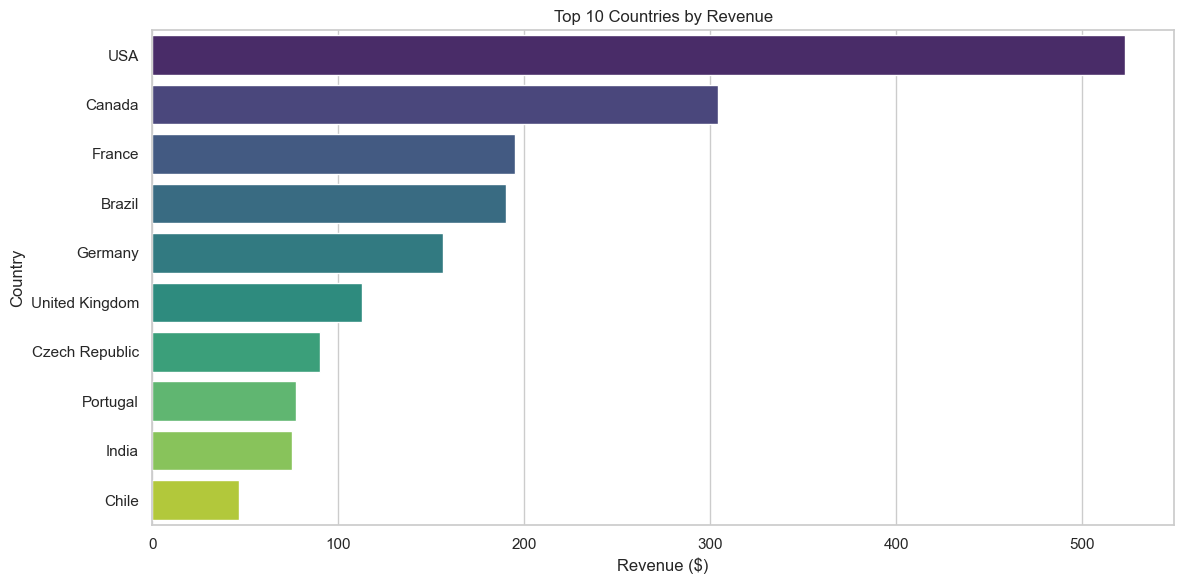

In [4]:
#visual of top 10 countries by revenue
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_country.head(10), x='TotalRevenue', y='Country', palette='viridis')
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Revenue ($)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


In [5]:
#calculates monthly revenue over time
query_monthly_sales = '''
SELECT 
    strftime('%Y-%m', i.InvoiceDate) AS YearMonth,
    ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS MonthlyRevenue
FROM 
    InvoiceLine il
JOIN 
    Invoice i ON il.InvoiceId = i.InvoiceId
GROUP BY 
    YearMonth
ORDER BY 
    YearMonth;
'''

monthly_sales = pd.read_sql_query(query_monthly_sales, conn)
monthly_sales


,YearMonth,MonthlyRevenue
0,2009-01,35.64
1,2009-02,37.62
2,2009-03,37.62
3,2009-04,37.62
4,2009-05,37.62
5,2009-06,37.62
6,2009-07,37.62
7,2009-08,37.62
8,2009-09,37.62
9,2009-10,37.62


In [8]:
#ranks products by how much revenue they made (TOP 10)
query_ranked_products = '''
SELECT 
    Product,
    TotalRevenue,
    RANK() OVER (ORDER BY TotalRevenue DESC) AS RevenueRank
FROM (
    SELECT 
        t.Name AS Product,
        ROUND(SUM(il.UnitPrice * il.Quantity), 2) AS TotalRevenue
    FROM 
        InvoiceLine il
    JOIN 
        Track t ON il.TrackId = t.TrackId
    GROUP BY 
        t.Name
)
LIMIT 10;
'''

ranked_products = pd.read_sql_query(query_ranked_products, conn)
ranked_products



,Product,TotalRevenue,RevenueRank
0,The Trooper,4.95,1
1,Branch Closing,3.98,2
2,Gay Witch Hunt,3.98,2
3,Hot Girl,3.98,2
4,How to Stop an Exploding Man,3.98,2
5,Phyllis's Wedding,3.98,2
6,Pilot,3.98,2
7,The Fix,3.98,2
8,The Woman King,3.98,2
9,Walkabout,3.98,2
